## Univariate time series prediction with energy consumption data


In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Dataset description and loading


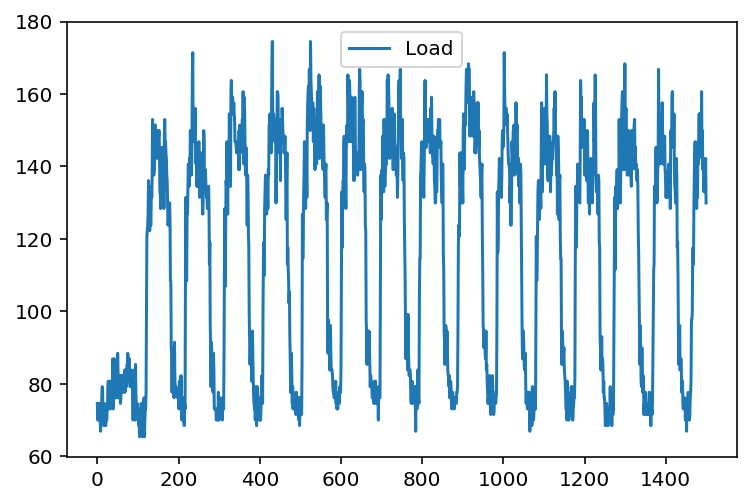

In [2]:
import os
os.chdir('C:/Users/이태호/Desktop/대학교/3학년/인공지능/개발자를 위한 머신 러닝/Machine-Learning-for-Developers-code-updates/Chapter07')

df = pd.read_csv("data/elec_load.csv", error_bad_lines=False)
plt.subplot()
plot_test, = plt.plot(df.values[:1500], label='Load')
plt.legend(handles=[plot_test])

## Data pre-processing

                Load
count  140256.000000
mean      145.332503
std        48.477976
min         0.000000
25%       106.850998
50%       151.428571
75%       177.557604
max       338.218126


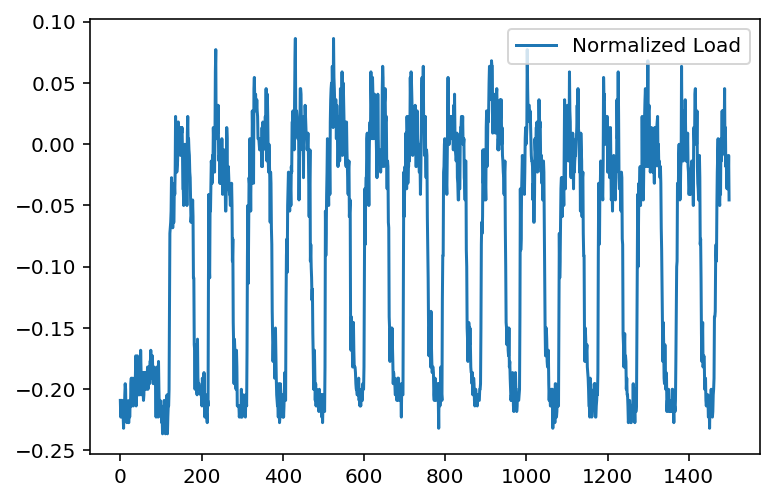

In [3]:
print(df.describe())
array=(df.values - 145.33) /338.21
plt.subplot()
plot_test, = plt.plot(array[:1500], label='Normalized Load')
plt.legend(handles=[plot_test])

In [4]:
listX = []
listy = []
X={}
y={}

for i in range(0,len(array)-6):
    listX.append(array[i:i+5].reshape([5,1]))
    listy.append(array[i+6])

arrayX=np.array(listX)
arrayy=np.array(listy)

X['train']=arrayX[0:13000]
X['test']=arrayX[13000:14000]

y['train']=arrayy[0:13000]
y['test']=arrayy[13000:14000]

In [5]:
#Build the model
model = Sequential()

model.add(LSTM( units=50, input_shape=(None, 1), return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM( units=200, input_shape=(None, 100), return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation("linear"))

model.compile(loss="mse", optimizer="rmsprop")  

In [6]:
#Fit the model to the data

model.fit(X['train'], y['train'], batch_size=512, epochs=10, validation_split=0.08)

Train on 11960 samples, validate on 1040 samples
Epoch 1/10
11960/11960 [==============================] - 4s 295us/step - loss: 0.0031 - val_loss: 0.0018
Epoch 2/10
11960/11960 [==============================] - 2s 167us/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/10
11960/11960 [==============================] - 2s 156us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/10
11960/11960 [==============================] - 2s 162us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/10
11960/11960 [==============================] - 2s 160us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/10
11960/11960 [==============================] - 2s 145us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/10
11960/11960 [==============================] - 2s 143us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/10
11960/11960 [==============================] - 2s 150us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/10
11960/11960 [==============================] - 2s 148us/step - loss: 0.0013 - val_loss: 0.00

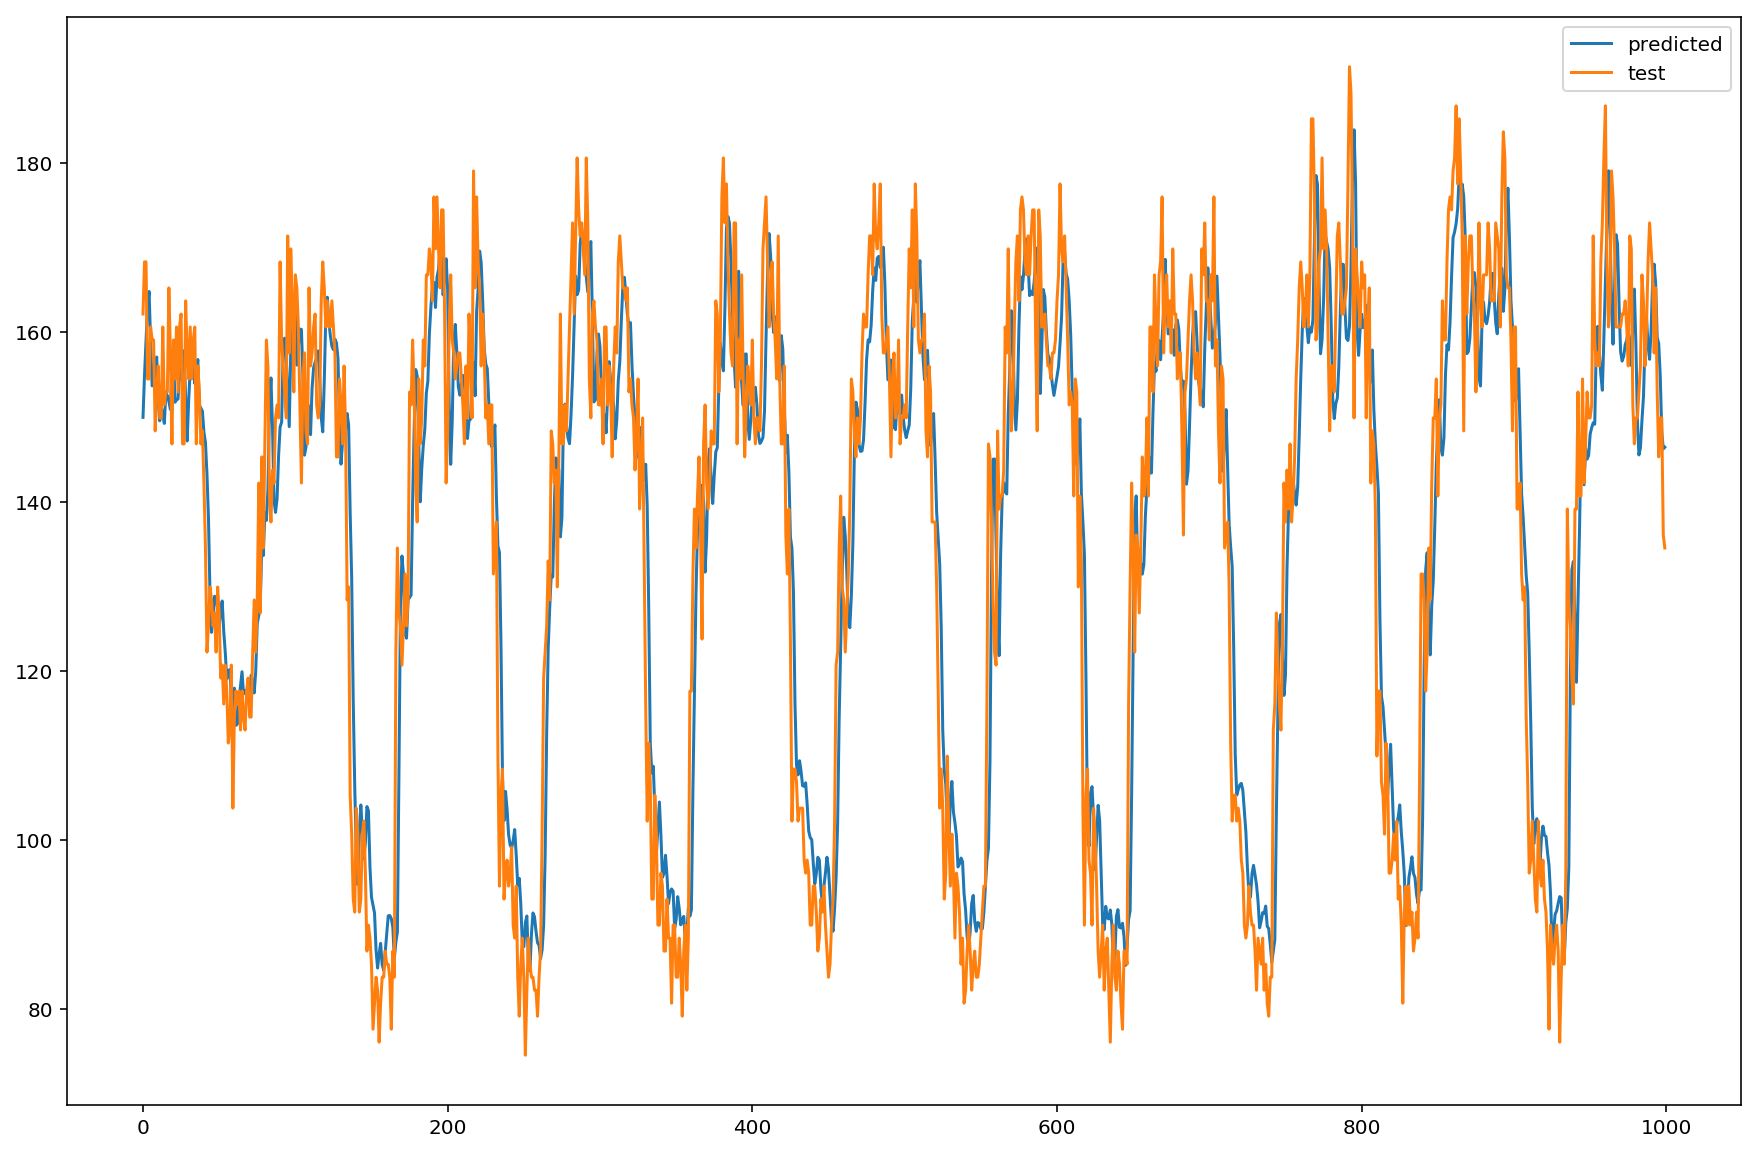

In [7]:
# Rescale the test dataset and predicted data

test_results = model.predict( X['test'])

test_results = test_results * 338.21 + 145.33
y['test'] = y['test'] * 338.21 + 145.33

plt.figure(figsize=(15,10))
plot_predicted, = plt.plot(test_results, label='predicted')

plot_test, = plt.plot(y['test']  , label='test');
plt.legend(handles=[plot_predicted, plot_test]);